In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
from scipy.stats import mannwhitneyu

In [3]:
train_df = pd.read_csv('train.csv', delimiter=',')
test_df = pd.read_csv('test.csv', delimiter=',')


## План исследования:
1) Описание набора данных и признаков
2) Первичный анализ признаков
3) Первичный визуальный анализ признаков
4) Закономерности, инсайты, особенности данных
5) Предобработка данных
6) Создание новых признаков
7) Кросс валидация, подбор параметров
8) Построение кривых валидации и обучения
9) Прогноз для тестовой и отлоденной выборки
10) Оценка модели с описанием выбранной метрики
11) Выводы

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1) Описание набора данных и признаков:
Для исследования я взял  набор данных с платформы Kaggle, который заранее был разбит на обучающую и отложенную выборки.
Данные содержат в себе 11 признаков. В тренировочной выборке 891 строка (68%), а в отложенной 418 строк (32%). Склеили обе таблицы, чтобы составить общую картину о данных.
Самым интересным признаком является выживаемость пассажира: выжил он или нет. Этот параметр мы и будем прогнозировать и классифицировать.
Вероятнее всего наиболее информативными признаками будут: пол, класс каюты, возраст.

In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df = pd.concat([train_df, test_df])
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Вс

## 2)Первичный анализ признаков


In [39]:
train_df.info(), train_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
         PassengerId    Survived      Pclass                     Name   Sex  \
 count    891.000000  891.000000  891.000000                      891   891   
 unique          NaN         NaN         NaN                      891     2   
 top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
 freq            NaN         NaN         NaN                        1   577   
 mean     446.000000    0.383838    2.308642                      NaN   NaN   
 std      257.353842    0.486592    0.836071                      NaN   NaN   
 min        1.000000    0.000000    1.000000                      NaN   NaN   
 25%      223.500000    0.000000    2.000000                      NaN   NaN   
 50%      446.000000    0.000000    3.000000                      NaN   NaN   
 75%      668.500000    1.000000    3.000000                      NaN   NaN   
 max      891.000000    1.000000    3.000000                      NaN   NaN   
 
                Age       SibSp       Parch

In [85]:
features = ["Age", "Fare", "Pclass", "SibSp", "Parch"]
print("Тренировочная выборка: мужчины")
print(train_df[train_df["Sex"] == "male"][features].describe())

print("Тренировочная выборка: женщины")
print(train_df[train_df["Sex"] == "female"][features].describe())

print("Тестовая выборка: мужчины")
print(test_df[test_df["Sex"] == "male"][features].describe())

print("Тестовая выборка: женщины")
print(test_df[test_df["Sex"] == "female"][features].describe())


Тренировочная выборка: мужчины
              Age        Fare      Pclass       SibSp       Parch
count  453.000000  577.000000  577.000000  577.000000  577.000000
mean    30.726645   25.523893    2.389948    0.429809    0.235702
std     14.678201   43.138263    0.813580    1.061811    0.612294
min      0.420000    0.000000    1.000000    0.000000    0.000000
25%     21.000000    7.895800    2.000000    0.000000    0.000000
50%     29.000000   10.500000    3.000000    0.000000    0.000000
75%     39.000000   26.550000    3.000000    0.000000    0.000000
max     80.000000  512.329200    3.000000    8.000000    5.000000
Тренировочная выборка: женщины
              Age        Fare      Pclass       SibSp       Parch
count  261.000000  314.000000  314.000000  314.000000  314.000000
mean    27.915709   44.479818    2.159236    0.694268    0.649682
std     14.110146   57.997698    0.857290    1.156520    1.022846
min      0.750000    6.750000    1.000000    0.000000    0.000000
25%     18.000

Проведя анализ для отложенной и тренировочной выборок по полу, можем сделать следующие выводы:
## Для тренировочной:
Средний возраст мужчин был выше: 30.7 против 29.9
Женский билет стоил дороже, чем мужской
Средний класс мужского билета был выше чем женского
В среднем, семьи путешествующих женщин были больше мужских
## Для отложенной:
Средний возраст мужчин и женщин не отличается
Мужские билеты по-прежнему дешевле женских
Средний класс мужского билета также выше женского
Женщины все также путешествуют с большей семьей

Применив критерий Мана-Уитни, подтверидили, что средний возраст и средня стоимость билета у мужчин и женщин действительно отличается.

In [9]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12]
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


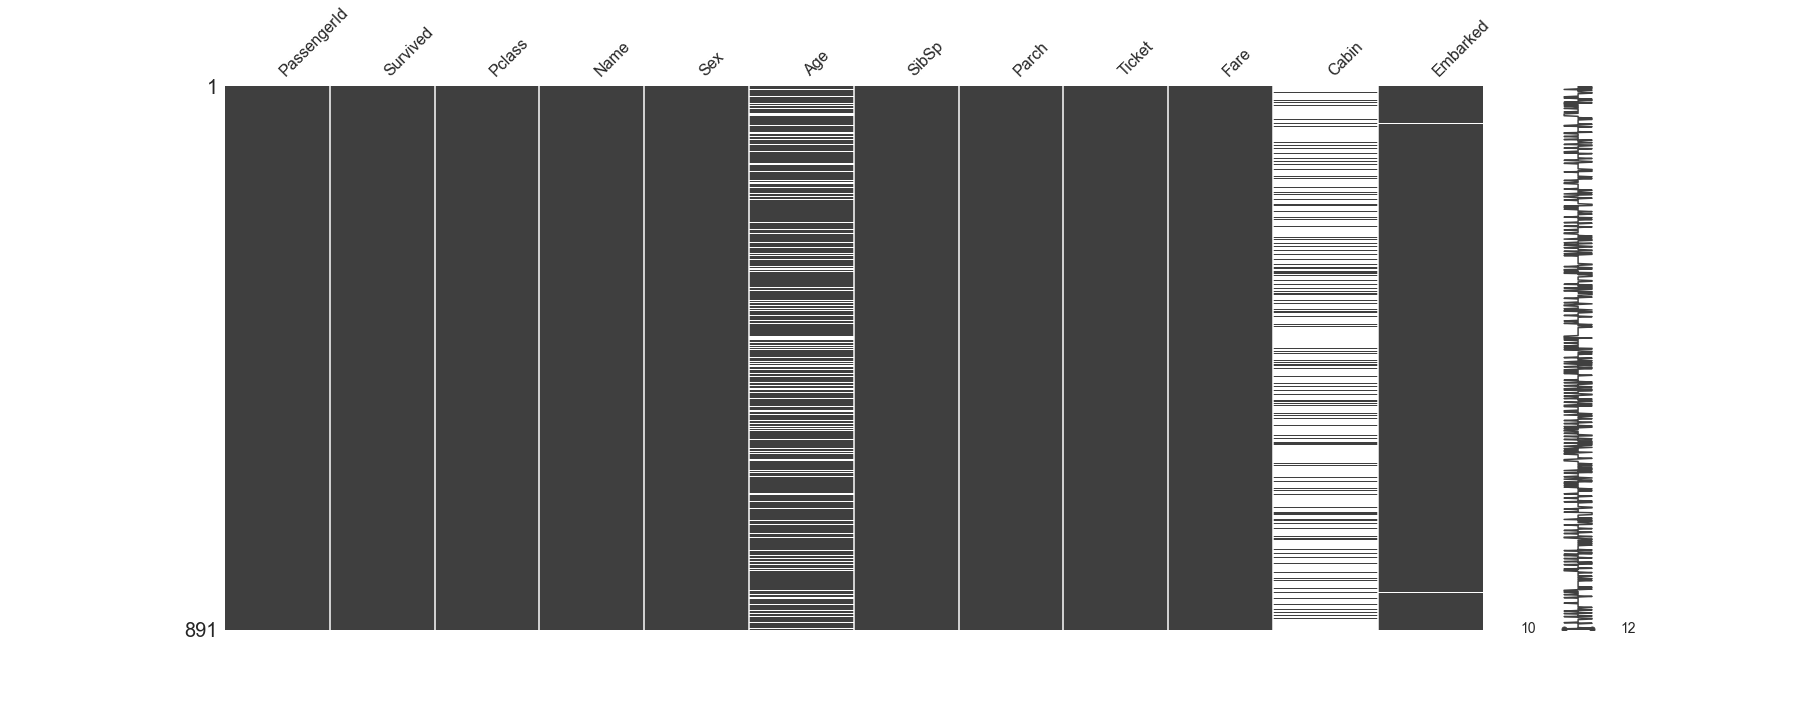

In [120]:
from IPython.display import Image
Image('missing_info.png')

## Краткая сводка по данным:
Анализируя график пропущенных значений делаем вывод, что в возрасте отстутсвуют 177 значений, в расположении кабин отсутствуют 687 значений и в городе посадки отсутствуют 2 значения. Больше всего пассажиров мужского пола 64.7%, средний возраст пассажиров 30 лет.
Данные имеют следующие признаки:
1) Surived - бинарный признак: выжил - 1 / не выжил - 0 пассажир
2) Pclass - класс билета пассажира 1, 2, 3
3) Name - Имя пассажира
4) Sex - пол пассажира мужчина / женщина
5) Age - возраст пассажира
6) SibSp - количество братьев/сестер или супругов, путешествующих с каждым пассажиром
7) Parch- Количество родителей детей
8) Ticket - номер билета
9) Fare - стоимость билета
10) Cabin - расположение/номер кабины
11) Embarked - город посадки на борт: S, C, Q


## Первичные выводы:
Наиболее интересными признаками, которые, с точки зрения логики, смогут определить выжил пассажир или нет являются:
1) пол и возраст пассажира, т.к капитан коробля приказал сажать на шлюпки первым делом женщин и детей(а в данном случае признак Parch,кол-во родителей, тоже будет играть существенную роль)

2) класс билета: т.к например каюты первого класса были расположены выше остальных. Из-за того, что столкновение с айсбергом произошло в ночное время, то большинство пассажиров коробля спали, и люди в нижних каютах и отделениях коробля имели гораздо меньше шансов на выживание, чем люди находившееся выше. Следуя этому выводу хотелось бы также включить в исследование расположение каюты, но т.к по этому признаку много утерянных данных, а построение модели коробля со всеми уникальными значениями - очень комплексная задача, то мы немного свернем этот признак о чем пойдет речь чуть позже.

3) Следуя здравому смыслу, можно точно сказать, что номер билета никак не повлияет на посадку. Город посадки может оказывать влияние, потому что пассажиры, которые заходили на борт последними, могли располагаться выше предыдущих. В имени пассажира можно найти обращение к нему, логично предположить, что высокопоставленный пассажир имел больше шансов на спасение.

4) Стоимость билета и количество братьев/сестер/супругов/родитилей могут повлиять на выживаемость пассажира, поэтому эти признаки исключать не будем.


In [115]:
train_df.groupby(['Pclass', 'Sex'])['Survived'].value_counts(normalize=True), train_df.groupby(['Pclass', 'Sex', 'Embarked'])['Survived'].value_counts(normalize=True)


(Pclass  Sex     Survived
 1       female  1           0.968085
                 0           0.031915
         male    0           0.631148
                 1           0.368852
 2       female  1           0.921053
                 0           0.078947
         male    0           0.842593
                 1           0.157407
 3       female  0           0.500000
                 1           0.500000
         male    0           0.864553
                 1           0.135447
 Name: Survived, dtype: float64,
 Pclass  Sex     Embarked  Survived
 1       female  C         1           0.976744
                           0           0.023256
                 Q         1           1.000000
                 S         1           0.958333
                           0           0.041667
         male    C         0           0.595238
                           1           0.404762
                 Q         0           1.000000
                 S         0           0.645570
                 

Из сводной таблицы можно подтвердить несколько, ранее выдвинутых предположений. Маршрут корабля проходил следующим образом: порт S-> порт C-> порт Q -> Нью-Йорк.
Таким образом имеем:
Выживаемость женщины из первого класса составляет почти 97%. 100% женщин из первого класса, севших в порту Q выжили, из севших в порту S выжило 96%, из порта C почти 98%
Выживаемость мужчины из первого класса составляет 63%. 1 мужчина из первого класса, севший в порту Q погиб, из севших в порту S выжило 35%, из порта C  40%
Выживаемость женщины из второго класса составляет 92%. 100% женщин из первого класса, севших в порту Q и С выжили, из севших в порту S выжило 91%
Выживаемость мужчины из второго класса составляет почти 16%. 20% мужчин из первого класса, севшие в порту С, выжили, из севших в порту S выжило 15%, один мужчина, севший в порту Q, погиб
Выживаемость женщины из третьего класса составляет 50%. 73% женщин из третьего класса, севших в порту Q выжили, из севших в порту С выжило 65%, из порта S выжили 37.5%
Выживаемость мужчины из третьего класса составляет 13.5%. 23% мужчин из третьего класса, севшие в порту С, выжили, из севших в порту S выжило 12.8%, из севшиех в порту Q выжили 7.7%
Предположение о посадке полностью подтверждается для женщин. У мужчин в случае порта Q логика не срабатывает. Позже мы проверим еще раз почему так произошло.


## 3) Первичный визуальный анализ признаков

Построим несколько графиков, чтобы визуализировать данные.

Text(0.5, 1.0, 'Стоимость билетов по классам')

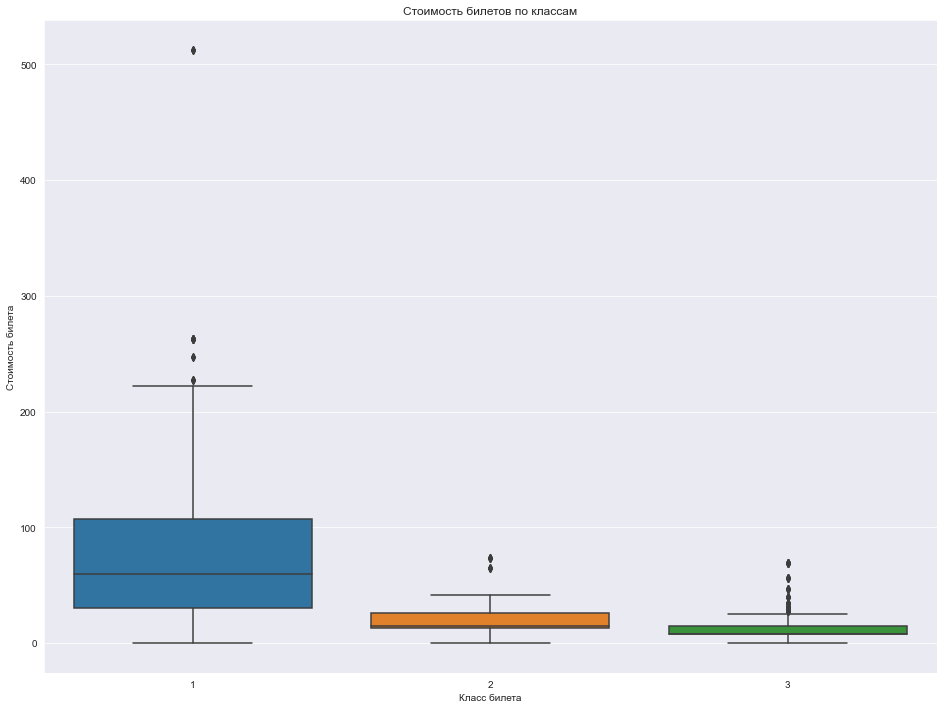

In [11]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.xlabel('Класс билета')
plt.ylabel('Стоимость билета')
plt.title('Стоимость билетов по классам')

График получился не очень красивым из-за выбросов. Давайте уберем все значения  по классам, которые отличаются от среднего больше чем на 2 ско.

/var/folders/pv/gbszyv_56q3c7bkb11_x0bcr0000gn/T/ipykernel_21494/3657390783.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df_no_outs = fare_pclass1_no_out.append(fare_pclass2_no_out).append(fare_pclass3_no_out)
/var/folders/pv/gbszyv_56q3c7bkb11_x0bcr0000gn/T/ipykernel_21494/3657390783.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df_no_outs = fare_pclass1_no_out.append(fare_pclass2_no_out).append(fare_pclass3_no_out)


<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

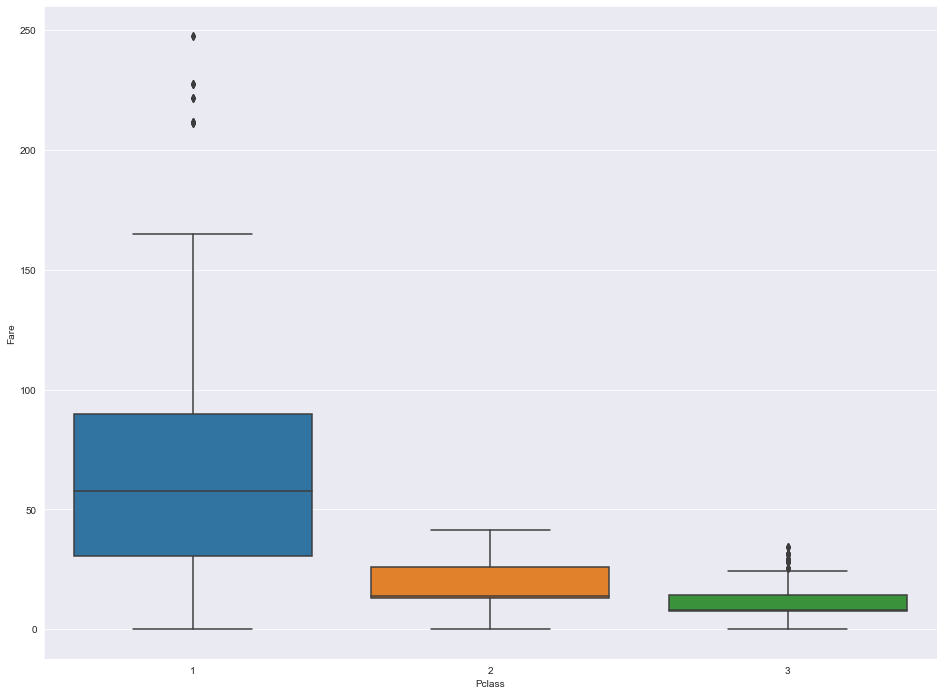

In [12]:
p1_std, p1_mn = df[df['Pclass']==1]['Fare'].std(), df[df['Pclass']==1]['Fare'].mean()
p2_std, p2_mn = df[df['Pclass']==2]['Fare'].std(), df[df['Pclass']==2]['Fare'].mean()
p3_std, p3_mn = df[df['Pclass']==3]['Fare'].std(),df[df['Pclass']==3]['Fare'].mean()
fare_pclass1_no_out = df[(df['Pclass'] == 1) & (abs(df['Fare'] - p1_mn) < 2 * p1_std)]
fare_pclass2_no_out = df[(df['Pclass'] == 2) & (abs(df['Fare'] - p2_mn) < 2 * p2_std)]
fare_pclass3_no_out = df[(df['Pclass'] == 3) & (abs(df['Fare'] - p3_mn) < 2 * p3_std)]
train_df_no_outs = fare_pclass1_no_out.append(fare_pclass2_no_out).append(fare_pclass3_no_out)
sns.boxplot(x='Pclass', y='Fare', data=train_df_no_outs)

Text(0.5, 1.0, 'Распределеие пассажиров по сумме родители детей')

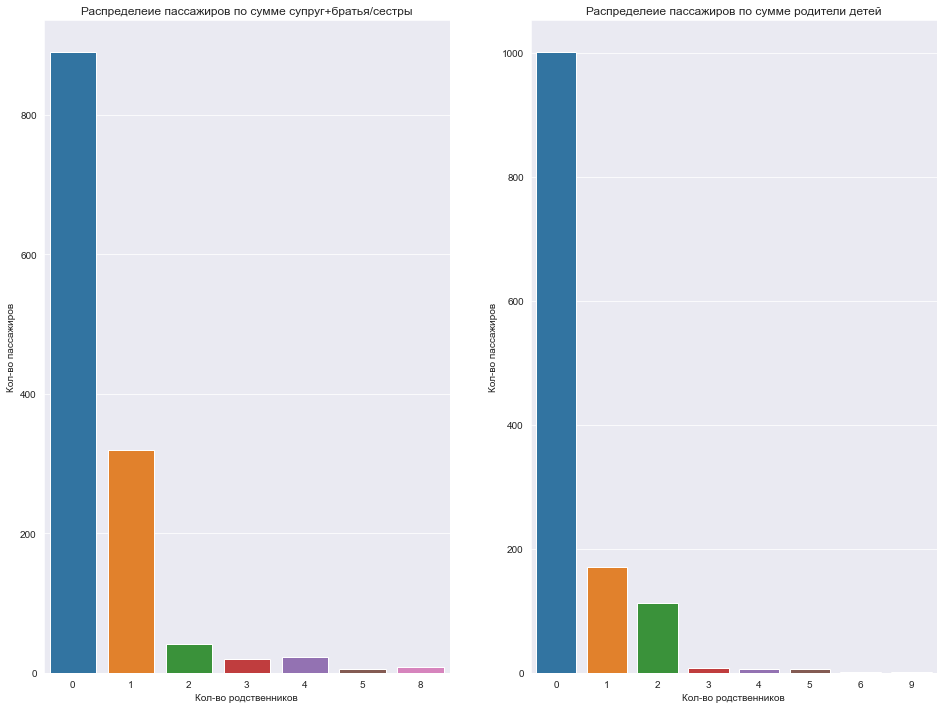

In [21]:
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='SibSp')
plt.xlabel('Кол-во родственников')
plt.ylabel("Кол-во пассажиров")
plt.title('Распределеие пассажиров по сумме супруг+братья/сестры')
plt.subplot(1,2,2)
sns.countplot(data=df, x='Parch')
plt.xlabel('Кол-во родственников')
plt.ylabel("Кол-во пассажиров")
plt.title('Распределеие пассажиров по сумме родители детей')

Как видно - большинство пассажиров путешествовало в одиночку.

/var/folders/pv/gbszyv_56q3c7bkb11_x0bcr0000gn/T/ipykernel_21494/3203037476.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


<AxesSubplot: xlabel='Sex', ylabel='count'>

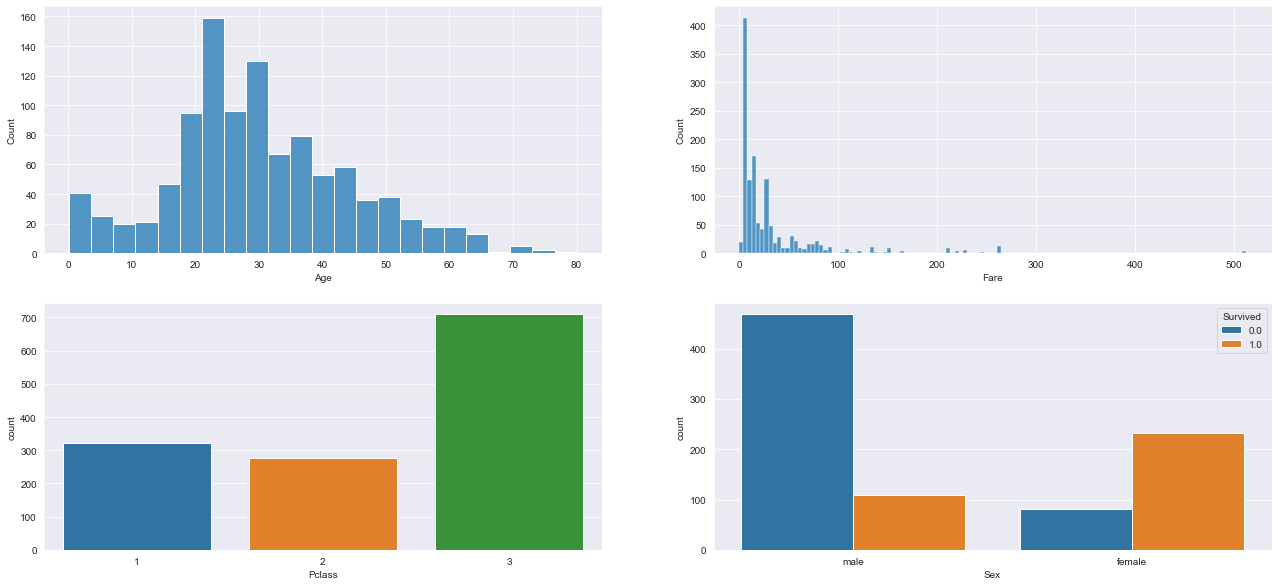

In [74]:
tab = pd.crosstab(df['Embarked'], df['Pclass'])
tab = tab.div(tab.sum(1).astype(float), axis=0)
figure= plt.subplots(figsize=(22, 10))
plt.subplot(2, 2, 1)
sns.histplot(data=df['Age'])
plt.subplot(2, 2, 2)
sns.histplot(data=df['Fare'])
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Pclass')
plt.subplot(2, 2, 4)
sns.countplot(x='Sex', hue='Survived', data=df)


Большинству пассажиров было от 20 до 30 лет.

График наглядно отображает статистику по выжившим и погибшим пассажирам из тренировочной выборки

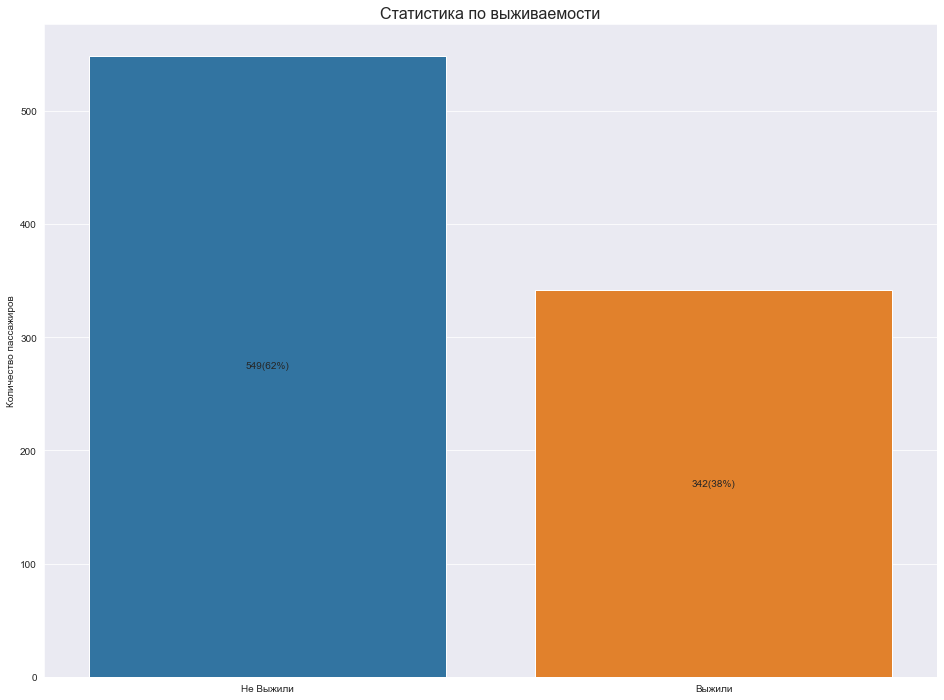

In [137]:
figure, survive_bar = plt.subplots(figsize=(16, 12))
sns.barplot(x= train_df["Survived"].value_counts().index, y = train_df["Survived"].value_counts(), ax = survive_bar)
survive_bar.set_xticklabels(['Не Выжили', 'Выжили'])
survive_bar.set_ylabel('Количество пассажиров')
survive_bar.set_title('Статистика по выживаемости', fontsize = 16)

for patch in survive_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    survive_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train_df.Survived))+')',
               horizontalalignment='center', verticalalignment='center')

Наглядно проверим соотношения выживаемости между мужчинами и женщинами.
Наши первичные выводы оказались верными и шанс выжить у женщины больше, чем у мужчины

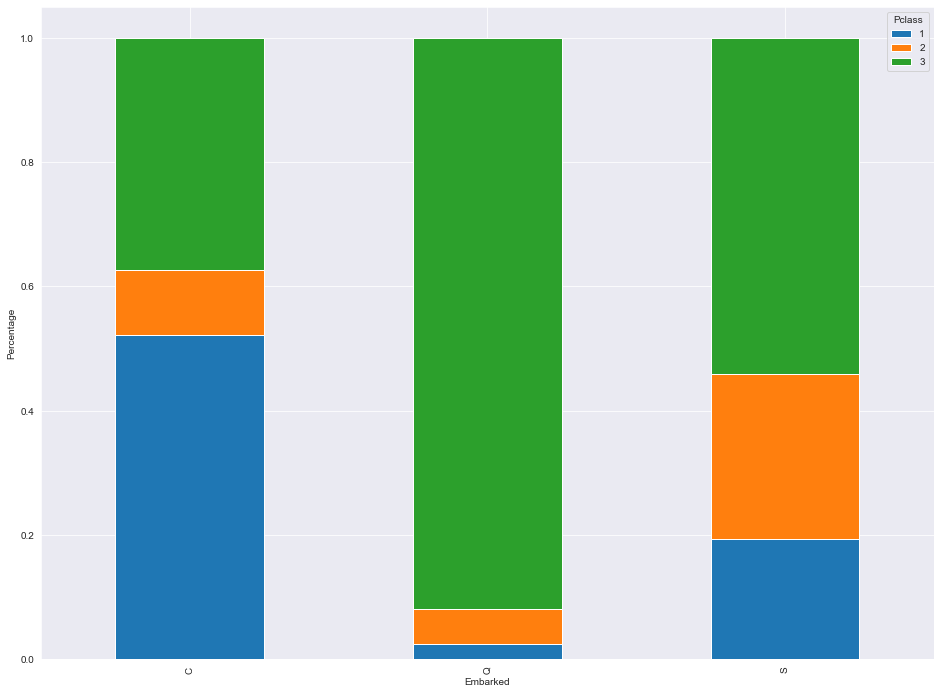

In [70]:
tab.plot(kind="bar", stacked=True)
plt.xlabel('Embarked')
plt.ylabel('Percentage')
plt.show()

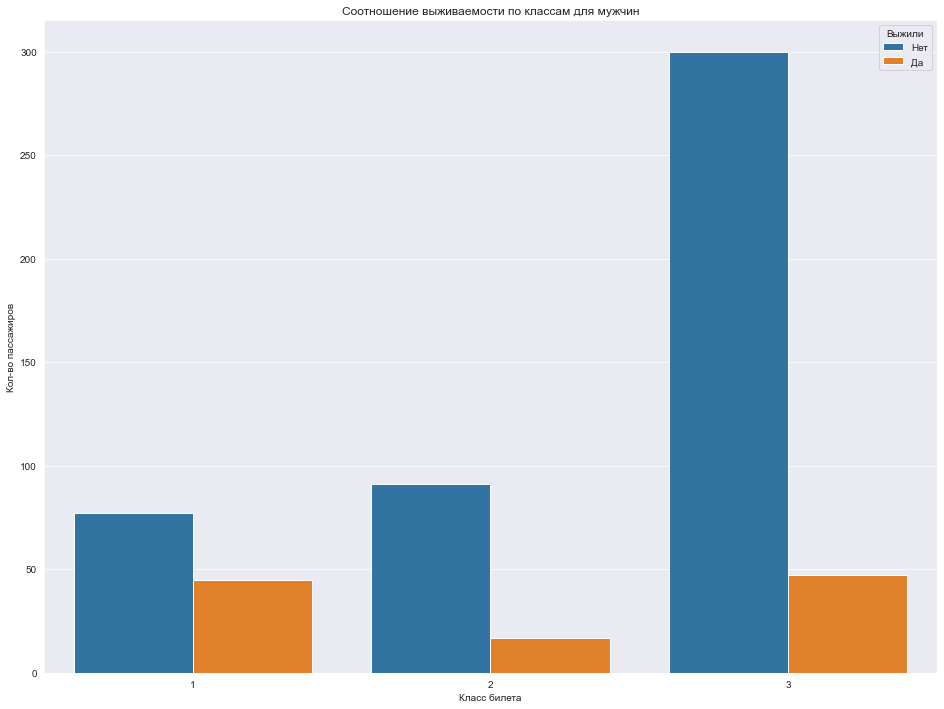

In [123]:
figure, survive_sex = plt.subplots(figsize=(16, 12))
sns.countplot(x='Pclass', hue='Survived', data=train_df[train_df.Sex == 'male'])
survive_sex.set_ylabel('Кол-во пассажиров')
survive_sex.set_xlabel('Класс билета')
survive_sex.set_xticklabels([1, 2, 3])
plt.legend(title='Выжили',loc='upper right', labels=['Нет','Да'])
plt.title('Соотношение выживаемости по классам для мужчин');

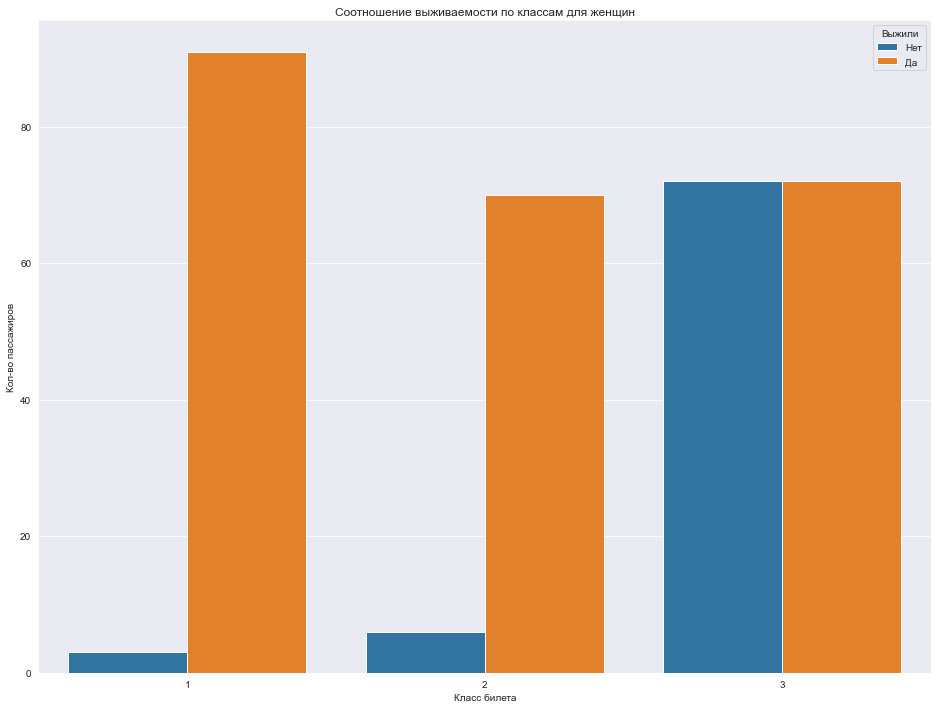

In [124]:
figure, survive_sex = plt.subplots(figsize=(16, 12))
sns.countplot(x='Pclass', hue='Survived', data=train_df[train_df.Sex == 'female'])
survive_sex.set_ylabel('Кол-во пассажиров')
survive_sex.set_xlabel('Класс билета')
survive_sex.set_xticklabels([1, 2, 3])
plt.legend(title='Выжили',loc='upper right', labels=['Нет','Да'])
plt.title('Соотношение выживаемости по классам для женщин');

## Общая визуализация шансов на спасение

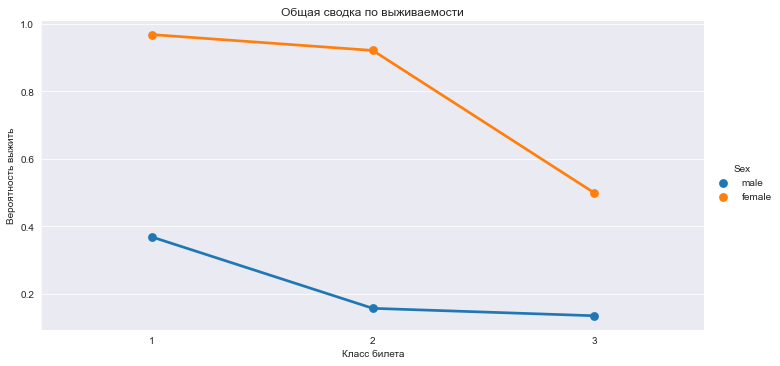

In [140]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', aspect=2, data=train_df, kind='point', ci=None);
plt.xlabel('Класс билета')
plt.ylabel('Вероятность выжить');
plt.title('Общая сводка по выживаемости');




Как видно из общего графика, выживаемость пассажира действительно сильно зависит от его пола и класса билета. Так женщины из первого и второго класса имеют гораздо больше шансов на выживание чем все мужчины и женщины из третьего класса, которые в свою очередь имеют больше шансов на выживание, чем мужчины из первого класса. Ну и судьба мужчин второго и третьего класса вовсе не завидна.

## 4) Закономерности, инсайты, особенности данных

Также прдлагаю проверить предположение о том, что возраст пассажира также влияет на его выживаемость.
Создадим искусивенный признак Молодость.
Если пассажиру меньше 25 лет, то будем считать его молодым, а если ему больше 60, то будем считать его старым

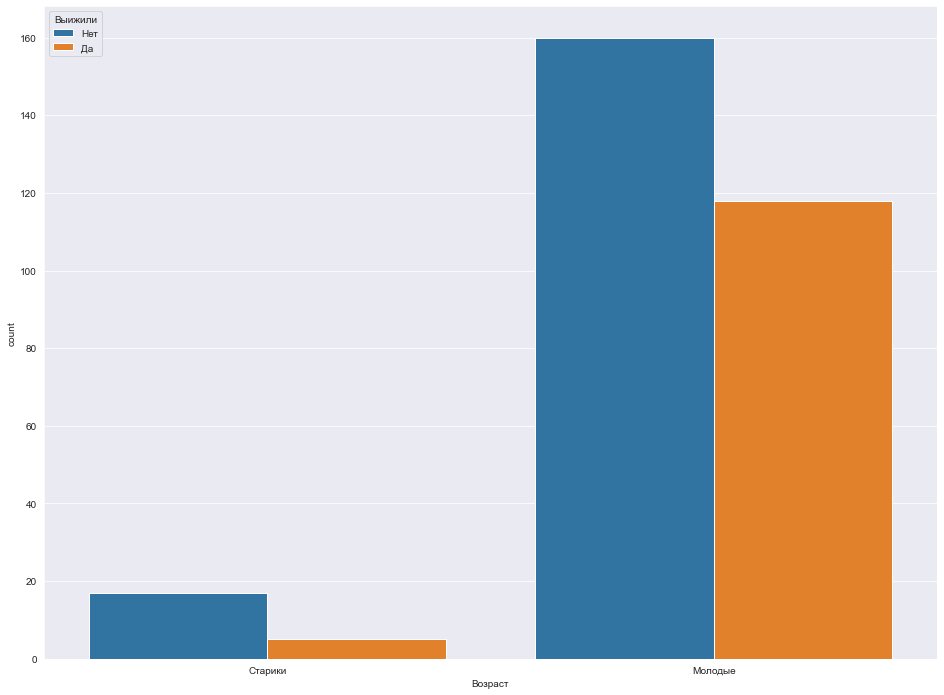

In [138]:
sub_df = train_df[(train_df['Age'] < 25) | (train_df['Age'] > 60)]
train_df['Young'] = (sub_df["Age"] < 60).astype("int64")
figure, survive_age = plt.subplots(figsize=(16, 12))
sns.countplot(x='Young', hue='Survived', data=train_df[(train_df['Young']==1) | (train_df['Young']==0)])
survive_age.set_xticklabels(['Старики', 'Молодые'])
survive_age.set_xlabel("Возраст")
plt.legend(title='Выижили',loc='upper left', labels=['Нет','Да']);

Оказывается на титанике было не так уж много пожилых людей. По полученной зависимости можно заметить тенденцию к большему шансу выжить у молодых людей, но стариков было не так уж и много, чтобы как-то всерьез воспринимать полученный результат, в дальнейшем нужно будет провести более сербезное исследование.

## 5) Предобработка данных

преобразуем

## 6) Создание новых признаков

## 7) Кросс валидация, подбор параметров

## 8) Построение кривых валидации и обучения

## 9) Прогноз для тестовой и отлоденной выборки

## 10) Оценка модели с описанием выбранной метрики